# Summary of Ride Sharing Data
## Observations
* As one might expect, urban cities tend to have the highest number of rides and drivers, with suburban at 2nd, and rural areas with the fewest. This is consistent with typical population densities for the respective city types.
* The bubble plot shows that average fares for most rural cities are relatively high, while the overall driver counts for rural cities are much lower than other city types (making up less than 3% of total drivers). It's possible that they are able to charge more per ride given that there is less competition in the area.
* On the other hand, urban ride fares are mostly below the mid-range fares ($30) across all cities, and tend to have higher ride and driver counts. Given that urban areas are typically more densely populated (among other factors), it would make sense that prices are kept low due to larger volume of rides and increased competition among more drivers.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to load
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

# Read city and ride data files
city_data = pd.read_csv(city_file)
ride_data = pd.read_csv(ride_file)

# Combine the data into a single dataset
all_data = pd.merge(ride_data, city_data, on='city')

# Display the data table for preview
all_data.sample(5)

,city,date,fare,ride_id,driver_count,type
491,Deanville,2018-03-29 04:07:48,5.32,2612669233491,49,Urban
684,Port Frank,2018-04-18 00:39:00,33.73,2262735363722,23,Urban
2122,Lewishaven,2018-03-02 07:48:06,33.22,810001942984,23,Suburban
1610,West Gabriel,2018-03-17 04:22:57,15.95,9297065011626,57,Urban
531,West Josephberg,2018-05-07 10:11:06,29.66,261961747605,45,Urban


## Bubble Plot of Ride Sharing Data

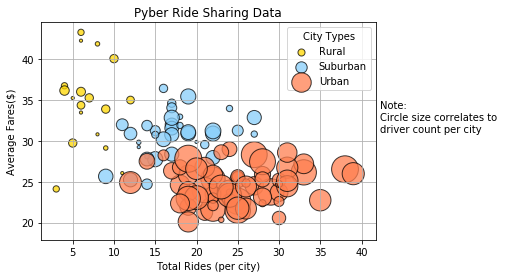

In [2]:
# Create dataframe with index set to city type
data_bubble = all_data.set_index('type')

# Obtain the x (rides per city) coordinates for each of the three city types

rides_rur = data_bubble.loc['Rural',['city','ride_id']]
rides_rur_grp = rides_rur.groupby('city').count()
# rides_rur_grp

rides_sub = data_bubble.loc['Suburban',['city','ride_id']]
rides_sub_grp = rides_sub.groupby('city').count()
# rides_sub_grp

rides_urb = data_bubble.loc['Urban',['city','ride_id']]
rides_urb_grp = rides_urb.groupby('city').count()
rides_urb_grp

# Obtain the y (average fare per city) coordinates for each of the three city types
fare_rur = data_bubble.loc['Rural',['city','fare']]
fare_rur_grp = fare_rur.groupby('city').mean()
# fare_rur_grp

fare_sub = data_bubble.loc['Suburban',['city','fare']]
fare_sub_grp = fare_sub.groupby('city').mean()
# fare_sub_grp

fare_urb = data_bubble.loc['Urban',['city','fare']]
fare_urb_grp = fare_urb.groupby('city').mean()
# fare_urb_grp

# Set up driver count
drv_count = city_data[['type','city','driver_count']].set_index('type')
# drv_count 


drv_count_rur = drv_count.loc['Rural',['city','driver_count']]

drv_count_sub = drv_count.loc['Suburban',['city','driver_count']]

drv_count_urb = drv_count.loc['Urban',['city','driver_count']]                              


# Build scatter plot for Rural Cities
plt.scatter(rides_rur_grp, 
            fare_rur_grp, 
            s = 10*drv_count_rur['driver_count'], 
            marker = 'o',
            c = 'gold',
            edgecolors = 'black',
            alpha = 0.75,
            label = 'Rural'
           )

# Build scatter plot for Suburban Cities
plt.scatter(rides_sub_grp, 
            fare_sub_grp, 
            s = 10*drv_count_sub['driver_count'], 
            marker = 'o',
            c = 'lightskyblue',
            edgecolors = 'black',
            alpha = 0.75,
            label = 'Suburban'
           )

# Build scatter plot for Urban Cities
plt.scatter(rides_urb_grp, 
            fare_urb_grp, 
            s = 10*drv_count_urb['driver_count'], 
            marker = 'o',
            c = 'coral',
            edgecolors = 'black',
            alpha = 0.75,
            label = 'Urban'
           )


# Incorporate the other graph properties
plt.grid(True)
plt.legend(loc = 'upper right', title = "City Types")
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Rides (per city)")
plt.ylabel("Average Fares($)")

# Incorporate a text label regarding circle size
note = "Note: \nCircle size correlates to \ndriver count per city"
plt.text(.91, 0.5, note, transform=plt.gcf().transFigure)


# Save Figure
plt.savefig("Images/Bubble_RideSharingData.png")


plt.show()

## Total Fares by City Type

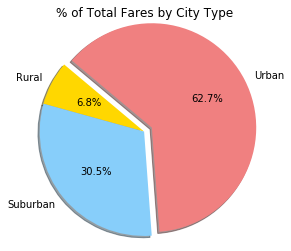

In [3]:
# Calculate fares for each city type
fares_data = all_data[['type','fare']].set_index('type')
fares_grp = fares_data.groupby('type').sum()
fare_sums = pd.Series(fares_grp['fare'])

# Build Pie Chart variables to be used on all 3 charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Build Pie Chart for fares
plt.pie(fare_sums, explode=explode, labels=labels, colors=colors, autopct="%.1f%%", radius=1.2,
        shadow=True, startangle = 140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Pie_FaresbyCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

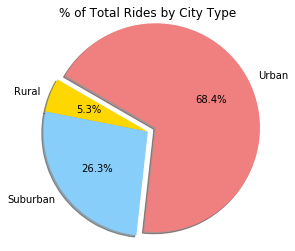

In [4]:
# Calculate rides per city type
rides_data = all_data[['type','ride_id']].set_index('type')
rides_grp = rides_data.groupby('type').count()
ride_counts = pd.Series(rides_grp['ride_id'])
ride_counts

# Build Pie Chart (note explode and label values already defined in first pie chart cell)
plt.pie(ride_counts, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct="%.1f%%", 
        radius=1.2,
        shadow=True, 
        startangle = 150
       )

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/Pie_RidesbyCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

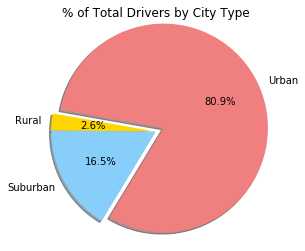

In [5]:
# Calculate total drivers by type
driver_data = city_data[['type','driver_count']].set_index('type')
driver_grp = driver_data.groupby('type').sum()
driver_sums = pd.Series(driver_grp['driver_count'])


# Build Pie Chart (note explode and label values already defined in first pie chart cell)
plt.pie(driver_sums, explode=explode, labels=labels, colors=colors, autopct="%.1f%%", radius=1.2,
        shadow=True, startangle = 170)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Pie_DriversbyCityType.png")

# Show Figure
plt.show()